<a href="https://colab.research.google.com/github/dbhecci/PRLEST/blob/main/DemoGuiaVizSNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Carga de datos

In [68]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
drive = Path('/content/drive/MyDrive')
path = drive/'RESOURSES/_data_resourses/Excel'/'queriesF1.xlsx'

In [ ]:
conductores2021 = pd.read_excel(path,sheet_name='drivers2021')
temporadas = pd.read_excel(path,sheet_name='ra_season')
constructores1 = pd.read_excel(path,sheet_name='constructor_winners')
constructores2 = pd.read_excel(path,sheet_name='constructor_pw')
conductoresFerrari = pd.read_excel(path,sheet_name='drivers_ferrari')
conductores = pd.read_excel(path,sheet_name='drivers_win20')
puntos = pd.read_excel(path,sheet_name='year_points')
conductores_ganadores = pd.read_excel(path,sheet_name='drivers_win_all')
carrerasporcircuitos = pd.read_excel(path,sheet_name='circuit_races')
circuitos = pd.read_excel(path,sheet_name='circuit_races3')


In [ ]:
sns.set_style("whitegrid")

In [ ]:
warnings.simplefilter("ignore", category=FutureWarning)

# Carreras por temporada

In [ ]:
temporadas

,Year,Races held
0,1950,7
1,1951,8
2,1952,8
3,1953,9
4,1954,9
...,...,...
68,2018,21
69,2019,21
70,2020,17
71,2021,22


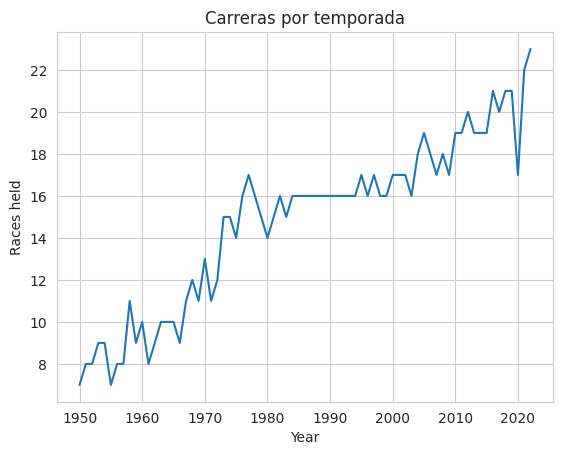

In [ ]:
sns.lineplot(data=temporadas, x="Year", y="Races held")
plt.title("Carreras por temporada")
plt.show()
#px.line(temporadas, x="Year", y="Races held", title="Carreras por temporada")

Este gráfico de líneas muestra la cantidad de carreras realizadas por temporada. El eje X representa los años, mientras que el eje Y muestra el número de carreras celebradas en cada temporada. El título destaca el tema principal de la visualización: la evolución del número de carreras a lo largo del tiempo.

# Constructores

In [ ]:
constructores1

,Team,Wins
0,Mercedes,115
1,Ferrari,103
2,Red Bull,75
3,McLaren,53
4,Renault,20
5,Williams,11
6,Brawn,8
7,Lotus F1,2
8,Toro Rosso,1
9,Racing Point,1


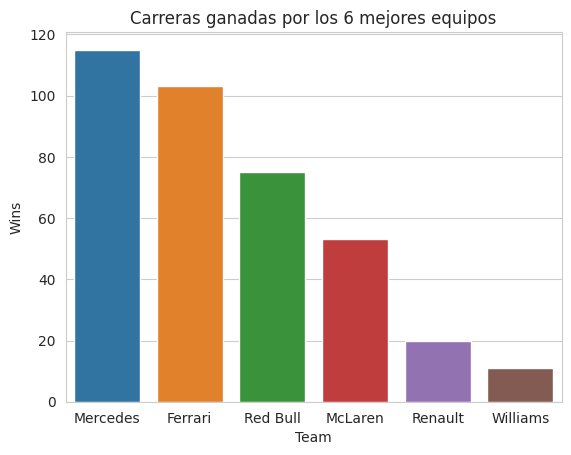

In [71]:
sns.barplot(data=constructores1[:6], x="Team", y="Wins", hue="Team", dodge=False, legend=False)
plt.title("Carreras ganadas por los 6 mejores equipos")
plt.show()


**Descripción del Gráfico:**

El gráfico de barras es una visualización que muestra la cantidad de victorias acumuladas por los seis equipos más destacados en una serie de carreras. Cada barra representa un equipo diferente, y la altura de la barra indica el número total de victorias logradas.

- **Eje X**: Equipos, con sus nombres etiquetados.
- **Eje Y**: Número total de victorias.

Este gráfico permite comparar fácilmente el rendimiento de los equipos, destacando cuál es el líder y cómo se posicionan los demás. Por ejemplo, puedes ver rápidamente qué equipo ha ganado más carreras en la serie. Este tipo de visualización ayuda a simplificar datos complejos y hace que la información sea más accesible, facilitando la identificación de tendencias y patrones.



In [ ]:
ColorTeams={    'Alfa Romeo':'#900000','AlphaTauri':'#2B4562','Alpine F1 Team':'#0090FF','Aston Martin':'#006F62','BMW Sauber':'#006EFF','BRM':'#160d75','Benetton':'#008860','Brabham':'#3c5680','Brabham-Climax':'#3c5681','Brabham-Ford':'#3c5682','Brabham-Repco':'#3c5683','Brawn':'#31f545','Cooper':'#3c557d','Cooper-Climax':'#3c557d','Cooper-Maserati':'#3c557d',
                'Eagle-Weslake':'#150f5c','Epperly':'#d9db5a','Ferrari':'#DC0000','Honda':'#FEFFFF','Jordan':'#f7f12f','Lotus F1':'#403e36','Lotus-BRM':'#403e37','Lotus-Climax':'#403e38','Lotus-Ford':'#477042','Maserati':'#d10816','McLaren':'#FF8700','McLaren-Ford':'#FF8700','Mercedes':'#00D2BE','Porsche':'#d4d4cf','Racing Point':'#F596C8','Red Bull':'#0600EF',
            'Renault':'#FFF500','Team Lotus':'#403e37','Toro Rosso':'#0005C1','Tyrrell':'#2f3780','Williams':'#005AFF','Haas F1 Team':'#E6002B' }

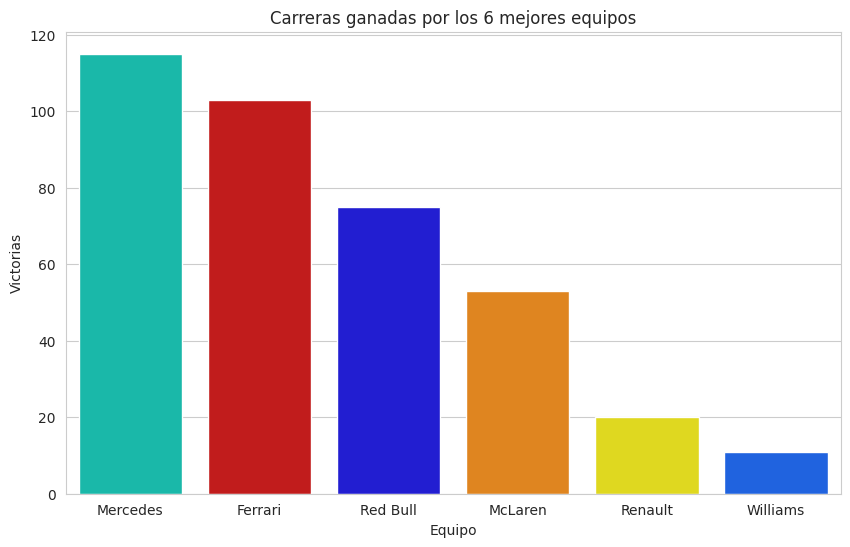

In [72]:
# sns
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(data=constructores1[:6], x="Team", y="Wins", hue="Team", palette=ColorTeams)
plt.title("Carreras ganadas por los 6 mejores equipos")
plt.xlabel("Equipo")
plt.ylabel("Victorias")
plt.show()

**Colores**

Dado que cada equipo tiene colores propios, se crea una paleta de colores ajustada a estos para una identificación más clara.



#Conductores

In [ ]:
conductores.head()

,Driver,Team,Wins
0,Mika Häkkinen,McLaren,6
1,David Coulthard,McLaren,7
2,Ralf Schumacher,Williams,6
3,Rubens Barrichello,Ferrari,9
4,Jarno Trulli,Renault,1


In [76]:
totalwins = (conductores.groupby(['Driver'], as_index=False).
             agg({'Wins': 'sum'}).
             rename(columns={'Wins': 'TotalWins'}))
sorted_conductores = conductores.merge(totalwins,how='left').sort_values(by=['TotalWins','Wins'], ascending=[False,False])
sorted_conductores.head()

,Driver,Team,Wins,TotalWins
22,Lewis Hamilton,Mercedes,82,103
14,Lewis Hamilton,McLaren,21,103
8,Michael Schumacher,Ferrari,56,56
17,Sebastian Vettel,Red Bull,38,52
24,Sebastian Vettel,Ferrari,14,52


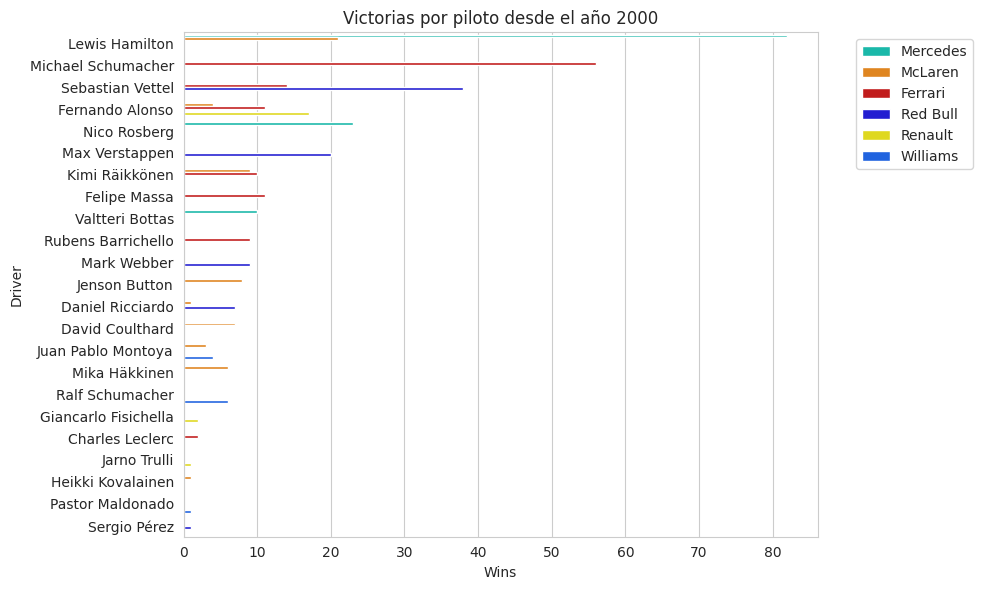

In [77]:
# Ordenar los conductores por el número de victorias
#sorted_conductores = sorted_conductores.sort_values("Wins", ascending=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=sorted_conductores, x="Wins", y="Driver", hue="Team", palette=ColorTeams)
plt.title("Victorias por piloto desde el año 2000")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Descripción del Gráfico:**

Este gráfico de barras horizontales apiladas muestra el total de victorias acumuladas por los pilotos desde el año 2000. Cada barra representa a un piloto, y la longitud de la barra indica el número total de victorias.

- **Eje X**: Número total de victorias obtenidas por cada piloto.
- **Eje Y**: Nombres de los pilotos, ordenados de menor a mayor número de victorias.
- **Colores**: Cada barra está coloreada según el equipo al que pertenece el piloto, utilizando una paleta de colores específica para cada equipo.

Este gráfico facilita la comparación del rendimiento de los pilotos, mostrando claramente quiénes tienen más victorias en comparación con otros. La visualización ordenada de menor a mayor permite identificar rápidamente a los pilotos con más victorias y ver cómo se distribuyen las victorias entre diferentes equipos. Es una herramienta útil para el análisis de datos en el contexto de competiciones y para entender las tendencias en el rendimiento de los pilotos.


# Puntos

In [ ]:
puntos.head()

,Team,Year,Points
0,Ferrari,2000,170.0
1,McLaren,2000,162.0
2,Williams,2000,36.0
3,Ferrari,2001,179.0
4,McLaren,2001,102.0


In [ ]:
puntos10 = puntos[puntos.Year>2009]

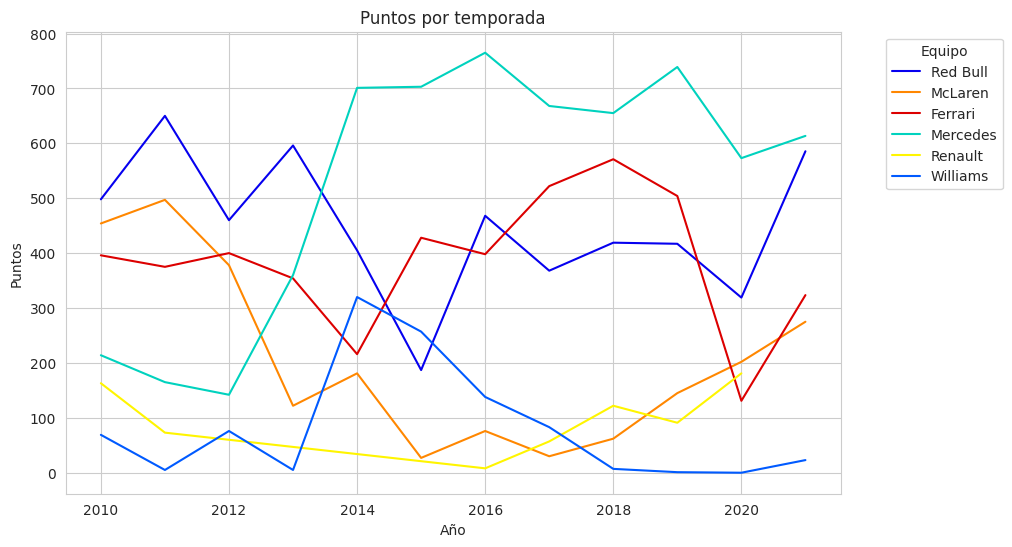

In [78]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=puntos10, x="Year", y="Points", hue="Team", palette=ColorTeams)
plt.title("Puntos por temporada")
plt.xlabel("Año")
plt.ylabel("Puntos")
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**Descripción del Gráfico:**

Este gráfico de líneas muestra la evolución de los puntos obtenidos por temporada. Cada línea representa a un equipo y traza la variación en el número de puntos a lo largo de los años.

- **Eje X**: Años de la temporada.
- **Eje Y**: Número de puntos obtenidos en cada temporada.

**¿Por qué es interesante?**

Este gráfico permite observar cómo los puntos de cada equipo cambian a lo largo del tiempo, facilitando la identificación de tendencias y patrones en el rendimiento de los equipos. Es útil para analizar la consistencia y el progreso de los equipos a lo largo de las temporadas.


# Temporada 2021

In [79]:
conductores2021.head()

,Driver,raceId,points,position,wins,round,circuit,Team
0,Lewis Hamilton,1052,25.0,1,1,1,Bahrain Grand Prix,Mercedes
1,Fernando Alonso,1052,0.0,19,0,1,Bahrain Grand Prix,Alpine F1 Team
2,Kimi Räikkönen,1052,0.0,11,0,1,Bahrain Grand Prix,Alfa Romeo
3,Sebastian Vettel,1052,0.0,15,0,1,Bahrain Grand Prix,Aston Martin
4,Sergio Pérez,1052,10.0,5,0,1,Bahrain Grand Prix,Red Bull


In [ ]:
ColorDrivers={'Lewis Hamilton': '#00D2BE',
              'Fernando Alonso': '#0090FF',
              'Kimi Räikkönen': '#900000',
              'Sebastian Vettel': '#006F62',
              'Sergio Pérez': '#0600EF',
              'Daniel Ricciardo': '#FF8700',
              'Valtteri Bottas': '#00D2BE',
              'Max Verstappen': '#0600EF',
              'Carlos Sainz': '#DC0000',
              'Esteban Ocon': '#0090FF',
              'Lance Stroll': '#006F62',
              'Antonio Giovinazzi': '#900000',
              'Pierre Gasly': '#2B4562',
              'Charles Leclerc': '#DC0000',
              'Lando Norris': '#FF8700',
              'George Russell': '#005AFF',
              'Nicholas Latifi': '#005AFF',
              'Yuki Tsunoda': '#2B4562',
              'Robert Kubica': '#900000',
              'Nikita Mazepin':'#E6002B',
              'Mick Schumacher':'#E6002B'}

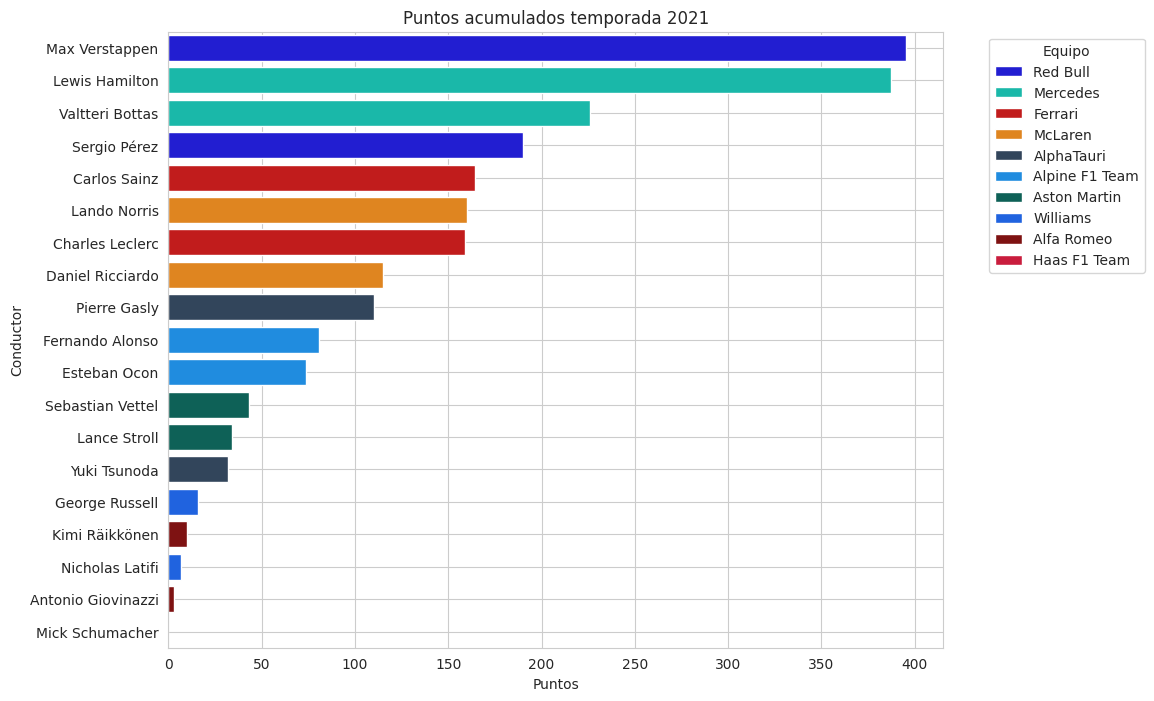

In [80]:
sorted_conductores = conductores2021[conductores2021.raceId == 1073].sort_values(by='position')
plt.figure(figsize=(10, 8))
sns.barplot(data=sorted_conductores, x="points", y="Driver", hue="Team", palette=ColorTeams)
plt.title('Puntos acumulados temporada 2021')
plt.xlabel('Puntos')
plt.ylabel('Conductor')
plt.legend(title='Equipo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Descripción del Gráfico:**


Este gráfico permite comparar rápidamente el rendimiento de los conductores en la temporada 2021, destacando quiénes acumularon más puntos y cómo se distribuyen los puntos entre diferentes equipos. La visualización ordenada facilita la identificación de los conductores con el mayor rendimiento y proporciona una visión clara de las posiciones relativas en la clasificación de puntos.


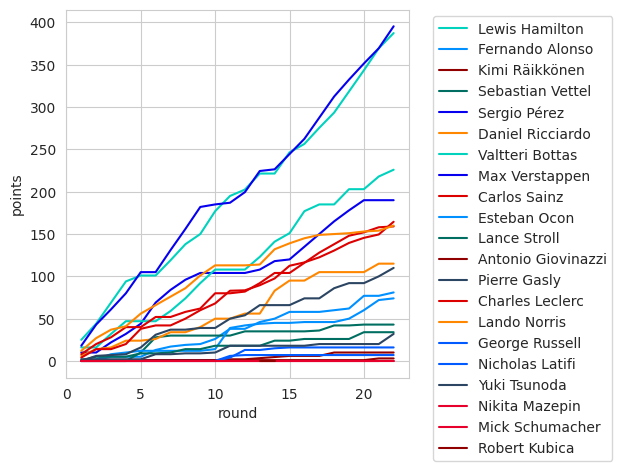

In [ ]:
sns.lineplot(data=conductores2021,
             x="round",
             y="points",
             hue='Driver',
             palette=ColorDrivers)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

El gráfico es una línea de tiempo que muestra la evolución de los puntos acumulados por cada conductor a lo largo de las diferentes rondas de una competencia (probablemente de 2021). Cada línea representa un conductor diferente, y el color de las líneas se distingue por la paleta ColorDrivers. La leyenda, que muestra los nombres de los conductores, está posicionada fuera del gráfico, en la parte superior izquierda, y el gráfico está ajustado para evitar que los elementos se superpongan.

In [ ]:
cond = conductores2021[(conductores2021.Driver=='Lewis Hamilton') | (conductores2021.Driver=='Max Verstappen')]

In [ ]:
ham = cond[cond.Driver=='Lewis Hamilton'][['round','points']].rename(columns={'points':'Lewis Hamilton'})
ver = cond[cond.Driver=='Max Verstappen'][['round','points']].rename(columns={'points':'Max Verstappen'})

In [ ]:
new_row = pd.DataFrame({
    'round': [0],
    'Lewis Hamilton': [0.0],
    'Max Verstappen': [0.0]
})

In [ ]:
dfcon = pd.concat([new_row,ham.merge(ver)], ignore_index=True)
dfcon.head()

,round,Lewis Hamilton,Max Verstappen
0,0,0.0,0.0
1,1,25.0,18.0
2,2,44.0,43.0
3,3,69.0,61.0
4,4,94.0,80.0


In [ ]:
data = {
    'round': list(range(0, 23)),
    'date': [
        '2021-03-27','2021-03-28', '2021-04-18', '2021-05-02', '2021-05-09', '2021-05-23',
        '2021-06-06', '2021-06-20', '2021-06-27', '2021-07-04', '2021-07-18',
        '2021-08-01', '2021-08-29', '2021-09-05', '2021-09-12', '2021-09-26',
        '2021-10-10', '2021-10-24', '2021-10-31', '2021-11-14', '2021-11-21',
        '2021-12-05', '2021-12-12'
    ],
    'gp': [
        '','Bahréin', 'Emilia Romaña', 'Portugal', 'España', 'Mónaco',
        'Azerbaiyán', 'Francia', 'Estiria', 'Austria', 'Gran Bretaña',
        'Hungría', 'Bélgica', 'Países Bajos', 'Italia', 'Rusia',
        'Turquía', 'Estados Unidos', 'México', 'Brasil', 'Australia',
        'Arabia Saudita', 'Abu Dabi'
    ]
}
df_f1_2021 = pd.DataFrame(data)
df_f1_2021['date'] = pd.to_datetime(df_f1_2021['date'])
df_f1_2021.head()

,round,date,gp
0,0,2021-03-27,
1,1,2021-03-28,Bahréin
2,2,2021-04-18,Emilia Romaña
3,3,2021-05-02,Portugal
4,4,2021-05-09,España


In [ ]:
df2021 = dfcon.merge(df_f1_2021,how='left')
df2021.head()

,round,Lewis Hamilton,Max Verstappen,date,gp
0,0,0.0,0.0,2021-03-27,
1,1,25.0,18.0,2021-03-28,Bahréin
2,2,44.0,43.0,2021-04-18,Emilia Romaña
3,3,69.0,61.0,2021-05-02,Portugal
4,4,94.0,80.0,2021-05-09,España


In [ ]:
# new datastructure for animation
start = 0
obs = len(df2021)+1

df = pd.DataFrame() # container for df with new datastructure
for i in np.arange(start,obs):
    dfa = df2021.head(i).copy()
    dfa['ix']=i
    df = pd.concat([df, dfa])
df.head()

,round,Lewis Hamilton,Max Verstappen,date,gp,ix
0,0,0.0,0.0,2021-03-27,,1
0,0,0.0,0.0,2021-03-27,,2
1,1,25.0,18.0,2021-03-28,Bahréin,2
0,0,0.0,0.0,2021-03-27,,3
1,1,25.0,18.0,2021-03-28,Bahréin,3


# Mapas

In [ ]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 56.8 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip



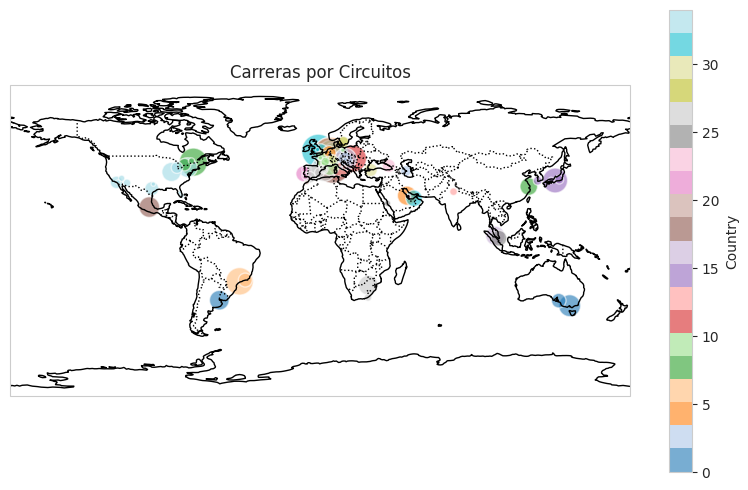

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})

ax.set_global()
ax.coastlines()

sc = ax.scatter(carrerasporcircuitos['lon'], carrerasporcircuitos['lat'],
                c=carrerasporcircuitos['country'].astype('category').cat.codes,
                s=carrerasporcircuitos['races'] * 10,
                cmap='tab20', alpha=0.6, edgecolors='w', transform=ccrs.PlateCarree())

ax.add_feature(cfeature.BORDERS, linestyle=':')
plt.colorbar(sc, label='Country')
plt.title('Carreras por Circuitos')
plt.show()


Este gráfico es un mapa geoespacial interactivo que utiliza el tipo de gráfico scatter_geo para representar los circuitos de carreras alrededor del mundo. Cada punto en el mapa está ubicado según las coordenadas de latitud (lat) y longitud (lon) provistas en los datos de carrerasporcircuitos.

El color de cada punto varía según el país (country), diferenciando los circuitos por su ubicación geográfica. Al pasar el cursor sobre un punto, aparece el nombre del circuito (hover_name). El tamaño de cada punto está determinado por la cantidad de carreras que se han realizado en ese circuito (races), de manera que los circuitos con más carreras se representan con puntos más grandes. Este tipo de visualización es útil para mostrar la distribución global de los circuitos y la importancia de cada uno en términos de número de carreras.